<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_14_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

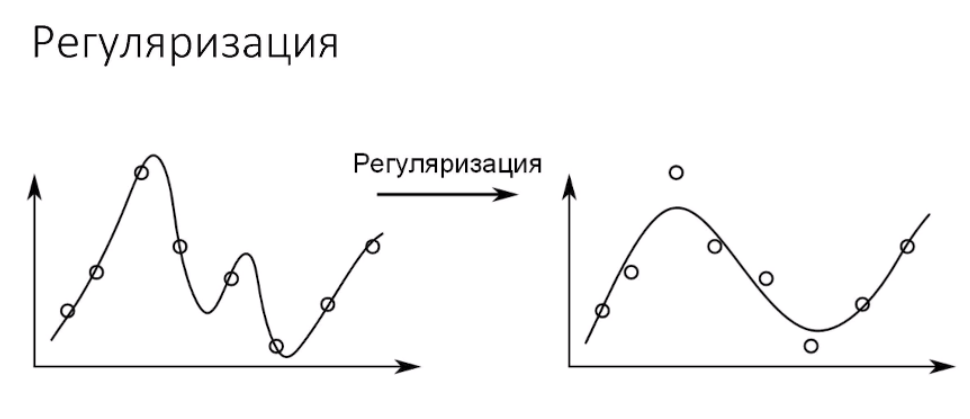

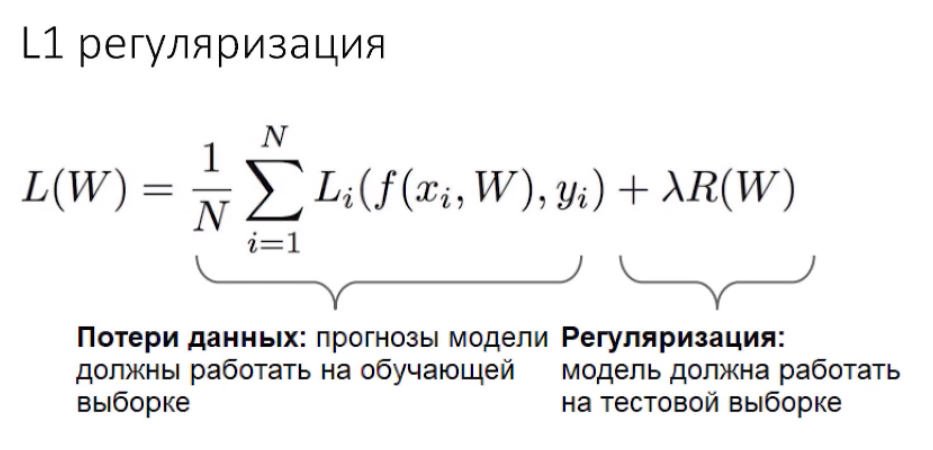

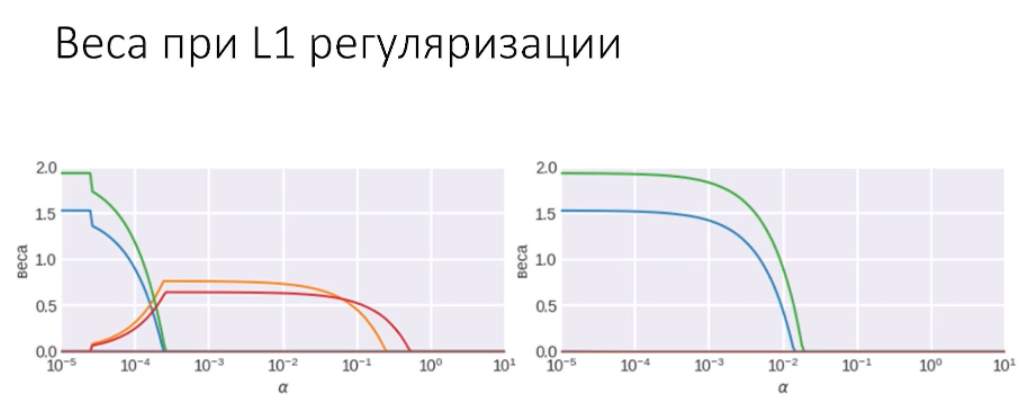

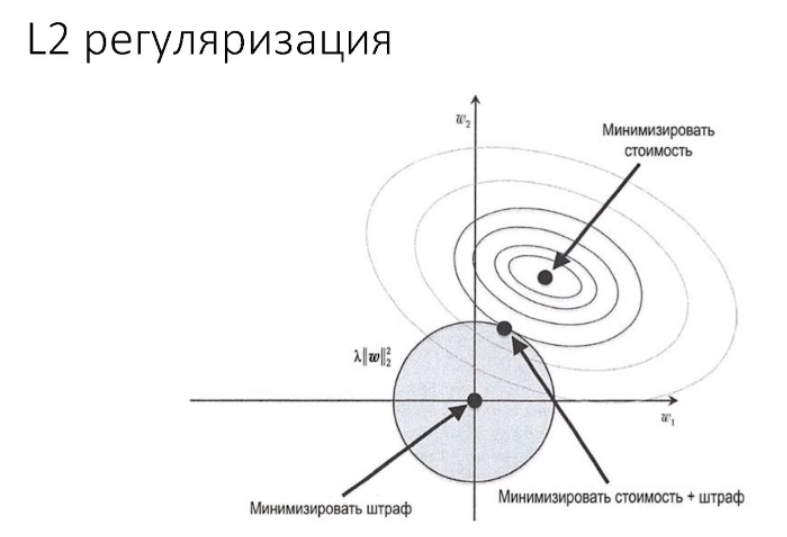

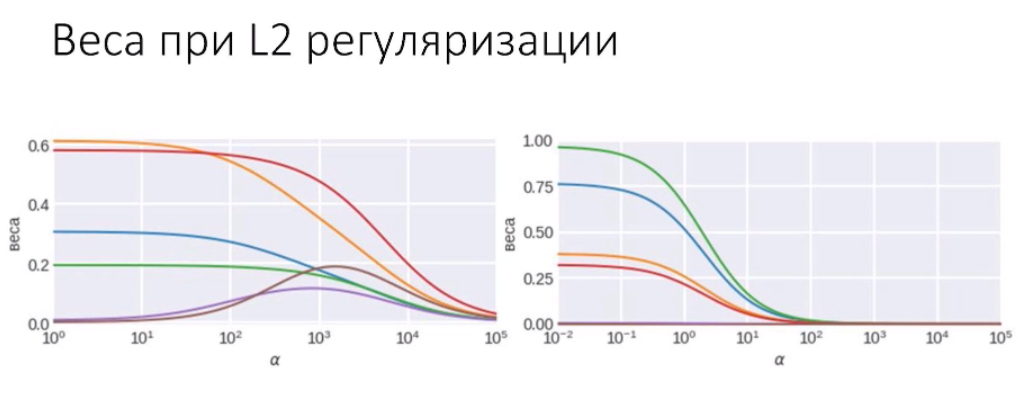

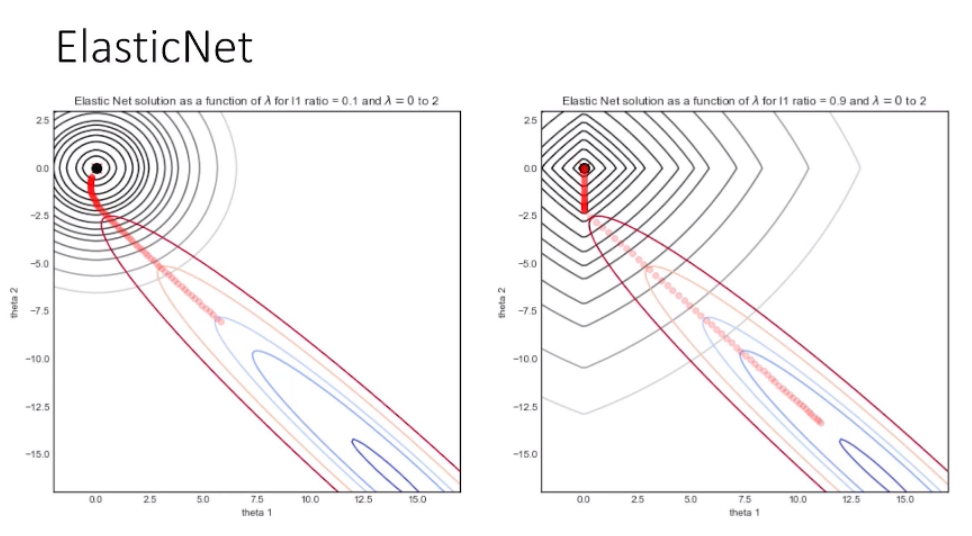

**Практикум**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')
data.head()

,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,air_temperature1,wind_direction_sin,wind_direction_cos,hour
0,2016-01-30 08:00:00,43.6839,8.3,0.0,6.1,0.0,1019.0,2.1,-2.3,-0.642788,-0.766044,8
1,2016-01-31 05:00:00,37.5408,12.8,0.0,10.0,0.0,1021.9,0.0,-1.1,0.000000,1.000000,5
2,2016-01-31 17:00:00,52.5571,20.6,0.0,11.7,0.0,1020.9,1.5,1.7,0.939693,-0.342020,17
3,2016-04-08 14:00:00,59.3827,21.7,2.0,14.4,0.0,1015.1,3.1,2.8,-0.939693,-0.342020,14
4,2016-05-01 19:00:00,448.0000,31.1,0.0,17.2,0.0,1016.1,4.1,1.1,0.984808,-0.173648,19


нормализация параметров температураи давление

In [ ]:
data_norm = MinMaxScaler().fit_transform(data[["air_temperature",
                                               "sea_level_pressure",
                                               "cloud_coverage",
                                               "dew_temperature",
                                               "precip_depth_1_hr",
                                               "wind_speed",
                                               "wind_direction_sin",
                                               "wind_direction_cos",
                                               "air_temperature1"]])
data_norm

array([[0.10610932, 0.73972603, 0.        , ..., 0.1786062 , 0.11697778,
        0.55617978],
       [0.25080386, 0.81917808, 0.        , ..., 0.5       , 1.        ,
        0.62359551],
       [0.50160772, 0.79178082, 0.        , ..., 0.96984631, 0.32898993,
        0.78089888],
       ...,
       [0.58842444, 0.79726027, 0.        , ..., 0.75      , 0.0669873 ,
        0.68539326],
       [0.57234727, 0.79726027, 0.        , ..., 0.67101007, 0.03015369,
        0.65730337],
       [0.50160772, 0.79726027, 0.        , ..., 0.5       , 1.        ,
        0.56179775]])

чистим по Х от Nan

In [ ]:
df = pd.DataFrame(data_norm)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5411 non-null   float64
 1   1       5383 non-null   float64
 2   2       5411 non-null   float64
 3   3       5411 non-null   float64
 4   4       5411 non-null   float64
 5   5       5411 non-null   float64
 6   6       5236 non-null   float64
 7   7       5236 non-null   float64
 8   8       5411 non-null   float64
dtypes: float64(9)
memory usage: 380.6 KB


In [ ]:
df[1] = df[1].interpolate()
df[6] = df[6].interpolate()
df[7] = df[7].interpolate()
data_norm = df.to_numpy()

модель линейной регрессии

без регуляции

In [ ]:
x = data_norm
y = data['meter_reading']
model = LinearRegression().fit(x, y)
print("Коэффициенты: ", model.coef_, model.intercept_)

Коэффициенты:  [ 86.66899106 -23.18305519  -2.36014034 118.53988578  23.4784644
 -42.04191894  -3.32335689  -1.74623631 -41.79787881] 141.3037399622025


In [ ]:
x = data_norm
y = data['meter_reading']
model = LinearRegression().fit(x, y)
print('meter_reading =', int(model.coef_[0]), '* air_temperature -',
      int(model.coef_[1]*(-1)),'* sea_level_pressure + ', int(model.intercept_))

meter_reading = 86 * air_temperature - 23 * sea_level_pressure +  141


In [ ]:
print("Коэфицент опрделенности (R2):", model.score(x,y))

Коэфицент опрделенности (R2): 0.35888960384686286


**ошибка модели RMSLE**

 линейной модели без регуляризации

In [ ]:
err_rmsle = (np.log(1 + data['meter_reading']) - np.log(1 + model.predict(data_norm)))**2
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle).mean()**0.5))

RMSLE: 0.21287


**L1 регуляризация**

ограничиваем сумму модулей весов (коэффициентов), precip_depth_1_hr обнуляется

In [ ]:
model_l1 = Lasso(alpha=0.1).fit(x, y)
print("Коэфиценты", model_l1.coef_, model_l1.intercept_)

Коэфиценты [ 79.66603561 -14.69048246  -0.51424051 122.02926648   0.
 -32.42134435  -3.0710317   -1.7449831  -24.39950367] 122.6402001172836


In [ ]:
print("Коэфицент опрделенности (R2):", model_l1.score(x,y))

Коэфицент опрделенности (R2): 0.356691573432261


In [ ]:
err_rmsle = (np.log(1 + data['meter_reading']) - np.log(1 + model_l1.predict(data_norm)))**2
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle).mean()**0.5))

RMSLE: 0.21344


**L2 регуляризация**

ограничиваем сумму увадратов весов(коэффициентов)

In [ ]:
model_l2 = Ridge(alpha=10).fit(x, y)
print("Коэфиценты", model_l2.coef_, model_l2.intercept_)

Коэфиценты [ 82.96140177 -24.79307633  -1.78451893 109.39683044  14.16384483
 -39.02010529  -2.74614395  -3.30572632 -30.00802268] 144.23090283373983


In [ ]:
print("Коэфицент опрделенности (R2):", model_l2.score(x,y))

Коэфицент опрделенности (R2): 0.35745848531207935


In [ ]:
err_rmsle2 = (np.log(1 + data['meter_reading']) - np.log(1 + model_l2.predict(data_norm)))**2
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle2).mean()**0.5))

RMSLE: 0.21253


**ElasticNet**

Линейная комбинация L1 и L2 регуляризации

In [ ]:
model_el = ElasticNet(alpha=0.001, l1_ratio=0.5).fit(x, y)
print("Коэфиценты", model_el.coef_, model_el.intercept_)

Коэфиценты [ 85.56545747 -23.8259611   -2.19755494 115.88979158  19.40450759
 -41.12744595  -3.1338039   -2.19819802 -37.90980382] 141.96265755636352


In [ ]:
print("Коэфицент опрделенности (R2):", model_el.score(x,y))

Коэфицент опрделенности (R2): 0.3587524399291693


In [ ]:
err_rmsle3 = (np.log(1 + data['meter_reading']) - np.log(1 + model_el.predict(data_norm)))**2
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle3).mean()**0.5))

RMSLE: 0.21272


**Практикум для самостоятельной работы**

1.Дайте определение регуляризации.


Регуляризация - это процесс добавления дополнительных ограничений на модель для предотвращения переобучения. Она может быть достигнута различными способами, такими как использование L1 или L2 норм для контроля весов модели или применение техник, таких как дропаут (dropout), которые позволяют предотвратить адаптацию нейронов к обучающей выборке. Основная цель регуляризации - улучшить обобщающую способность модели, то есть её способность корректно работать на данных, которые не входили в обучающую выборку.

**Задание спикера**

2.L1 регуляризация

L1-регуляризация — она же «манхэттенское расстояние» или «регрессия лассо». Ее идея заключается в том, чтобы сводить набор правил на наиболее важных функциях, которые влияют на конечный результат. Этот способ выглядит как способ выбора признаков. Выражается формулой: L1 = Σ(yi — y(ti))2 + λΣ|ai|.

L1 регуляризация, также известная как LASSO (обобщенный метод наименьших квадратов), является методом регуляризации, используемым для решения задач машинного обучения и статистики. Она добавляет к целевой функции дополнительное слагаемое, пропорциональное сумме абсолютных значений коэффициентов модели.

Цель L1 регуляризации состоит в том, чтобы уменьшить количество используемых параметров модели, делая ее более интерпретируемой и устойчивой к переобучению. Это достигается за счет введения дополнительного слагаемого, которое стремится сделать многие коэффициенты равными нулю. В результате мы получаем модель, которая использует только значимые параметры и отбрасывает шум.

L1 регуляризация особенно полезна в ситуациях, когда у нас есть много потенциальных предикторов, и мы хотим выбрать только наиболее значимые из них. Это может быть полезно, например, при выборе наиболее важных признаков для классификации или регрессии.

Однако у L1 регуляризации есть и недостатки. Один из них заключается в том, что она может привести к “огрублению” модели, то есть к потере некоторых деталей. Кроме того, она может быть менее эффективной, чем L2 регуляризация, в случае, если данные содержат много шума.


3.L2 регуляризация

L2-регуляризация — она же регуляризация Тихонова или «регрессия хребта». Этот вид регуляризации несколько похож на первый вид. По крайней мере, они выполняют одни и те же функции. Однако основная направленность деятельности этого метода — агрессивное применение штрафов. Практически получается, что этот метод не подходит для выбора признаков функции. В этом его основное отличие от L1. Выражается формулой: L2 = Σ(yi — y(ti))2 + λΣai2.

Регуляризация L2 работает путем введения дополнительного слагаемого в функцию потерь, которое равно сумме квадратов всех весов, умноженной на некоторый коэффициент регуляризации:

R(w) = 0.5 * lambda * sum(w^2)

где w - вектор весов модели, а lambda - коэффициент регуляризации.

Этот метод регуляризации особенно полезен для линейных моделей, таких как линейная регрессия и логистическая регрессия. Он помогает предотвратить чрезмерное увеличение весов модели, что может привести к переобучению. В результате модель становится более устойчивой и обобщаемой на новых данных.



**Задание спикера**

Построить 24 модели линейной регрессии с ElasticNet по часам

In [ ]:
ensamble = []
for h in range(24):
  data1 =  data.loc[data['hour'] == h]
  scaler = MinMaxScaler().fit_transform(data1[["air_temperature",
                                               "sea_level_pressure",
                                               "cloud_coverage",
                                               "dew_temperature",
                                               "precip_depth_1_hr",
                                               "wind_speed",
                                               "wind_direction_sin",
                                               "wind_direction_cos",
                                               "air_temperature1"]])
  df = pd.DataFrame(scaler)
  df[1] = df[1].interpolate()
  df[6] = df[6].interpolate()
  df[7] = df[7].interpolate()
  data_norm = df.to_numpy()
  x = data_norm
  y = data1['meter_reading']
  model_el = ElasticNet(alpha=0.001, l1_ratio=0.5).fit(x, y)
  print("Коэфиценты по часу:", h, model_el.coef_, model_el.intercept_)
  ensamble.append(model_el)

print (ensamble)

Коэфиценты по часу: 0 [100.8391749  -10.38841881 -10.65282608  73.23288029  -2.45185654
 -19.00323289  -5.57340485  -3.00388304   1.83394462] 137.04975810213938
Коэфиценты по часу: 1 [131.13638     -9.81357764  -3.00062387  37.32202793 -21.51465977
 -16.63200747  -6.50042827   3.95483928   2.74454632] 133.3438180610504
Коэфиценты по часу: 2 [133.19775084  -2.8732688   -6.32024622  46.11764308 -15.97948169
 -15.3249097    5.19821177  -0.55701883  -7.00581185] 120.34337742606445
Коэфиценты по часу: 3 [124.70893116 -10.47025909  19.73522123  23.57032883  -0.43077587
 -27.33828738  -6.55771605  -8.1064668   13.96841597] 140.84796058250816
Коэфиценты по часу: 4 [149.33177354 -15.69853837  15.53197722  -9.25621302 -13.74889988
 -35.6627882   -2.60174349  -5.74552049  14.18299215] 154.19188706257336
Коэфиценты по часу: 5 [180.65818464  -2.9538764    1.13716686 -26.8958232   11.80265711
 -29.1274605  -12.79653013  -1.9510161   -1.72650897] 143.02239697435832
Коэфиценты по часу: 6 [ 1.63998846e

Ошибкв модели

In [ ]:
print("Коэфицент опрделенности (R2):", model_el.score(x,y))

Коэфицент опрделенности (R2): 0.33321427542327


In [ ]:
err_rmsle4 = []
for h in range(24):
  data1 = data.loc[data['hour']==h]
  data_norm = MinMaxScaler().fit_transform(data1[["air_temperature",
                                               "sea_level_pressure",
                                               "cloud_coverage",
                                               "dew_temperature",
                                               "precip_depth_1_hr",
                                               "wind_speed",
                                               "wind_direction_sin",
                                               "wind_direction_cos",
                                               "air_temperature1"]])
  df = pd.DataFrame(data_norm)
  df[1] = df[1].interpolate()
  df[6] = df[6].interpolate()
  df[7] = df[7].interpolate()
  data_norm = df.to_numpy()
  err_rmsle4.extend(((np.log(1 + data1['meter_reading']) - np.log(1 + model_el.predict(data_norm)))**2).values)

print ('RMSLE: {0:.5}'. format(np.array(err_rmsle3).mean()**0.5))

RMSLE: 0.21272


все лучше и лучше

расчитаем оптимальные значения гиперпараметров

In [ ]:
err_rmsle = (np.log(1 + data['meter_reading']) - np.log(1 + model_el.predict(data_norm)))**2
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle3).mean()**0.5))

RMSLE: 0.21254


Alpha:0.0001, R2:0.36, MSE:1547.34, RMSE:39.34
Alpha:0.0010, R2:0.36, MSE:1547.67, RMSE:39.34
Alpha:0.0100, R2:0.35, MSE:1565.50, RMSE:39.57
Alpha:0.1000, R2:0.24, MSE:1829.97, RMSE:42.78
Alpha:0.3000, R2:0.14, MSE:2072.26, RMSE:45.52
Alpha:0.5000, R2:0.10, MSE:2172.07, RMSE:46.61
Alpha:0.7000, R2:0.08, MSE:2228.43, RMSE:47.21
Alpha:1.0000, R2:0.06, MSE:2278.99, RMSE:47.74
R2:0.338, MSE:1540.74, RMSE:39.25


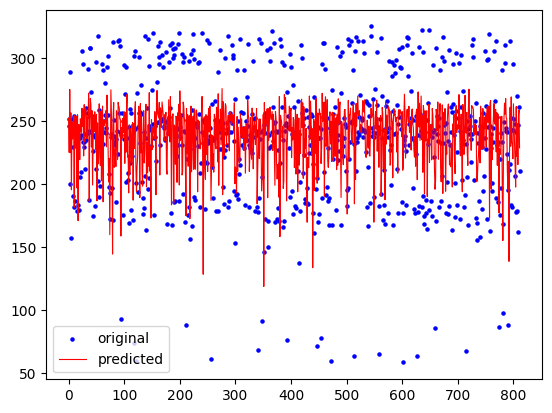

In [ ]:
#from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#boston = data
#x, y = data_norm, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()




0.001
151.099073362806
R2:0.353, MSE:1507.55, RMSE:38.83


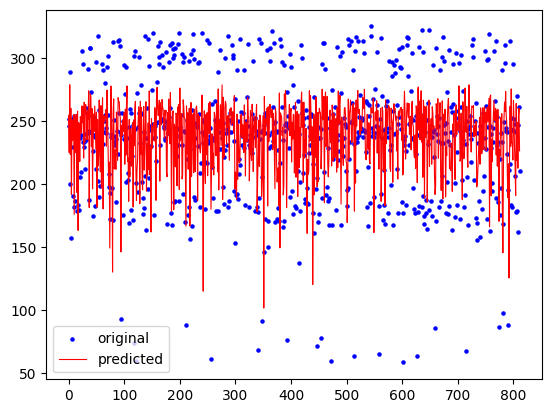

In [ ]:
# --- ElasticNetCV ----
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()